# Nouveaux solvers

L'objectif de ce notebook est de comprendre l'utilisation des nouveaux solveurs implémentés dans `scipy`.

# Imports

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
plt.rcParams["figure.figsize"] = (12, 8)

In [1]:
from scipy.integrate import solve_ivp

# Exemple trivial

In [4]:
def flux(t, x):
    return -2.*x

In [5]:
resultat = solve_ivp(fun=flux, y0=[0.5], t_span=(0, 10), dense_output=True)

Le solveur renvoit un objet, contenant des données et des méthodes.

In [6]:
dir(resultat)

['message',
 'nfev',
 'njev',
 'nlu',
 'sol',
 'status',
 'success',
 't',
 't_events',
 'y']

In [7]:
resultat.t

array([ 0.        ,  0.07581612,  0.5399366 ,  1.00405708,  1.46817755,
        1.93229803,  2.39641851,  2.86053899,  3.32465947,  3.8061983 ,
        4.33243295,  4.93195705,  5.64427923,  6.52515072,  7.66290177,
        9.20113225, 10.        ])

In [8]:
resultat.y

array([[5.00000000e-01, 4.29652123e-01, 1.69940940e-01, 6.72169916e-02,
        2.65864362e-02, 1.05157725e-02, 4.15931904e-03, 1.64514162e-03,
        6.50705299e-04, 2.48617472e-04, 8.69421938e-05, 2.63365434e-05,
        6.45026871e-06, 1.21640724e-06, 2.30894414e-07, 1.50515384e-07,
        3.18123894e-08]])

On voit que l'on a pas précisé les points où la solution est calculée, mais on a demandé la création d'une méthode `sol` permettant l'interpolation des valeurs calculées grâce à `dense_output=True`.

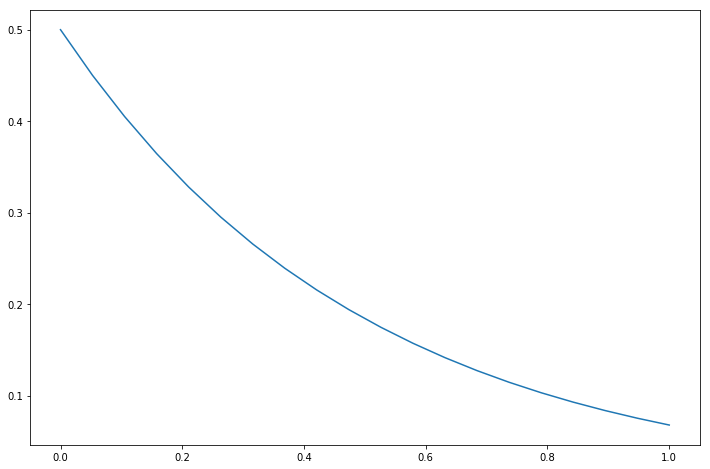

In [16]:
t = np.linspace(0, 1, 20)
y, = resultat.sol(t)
plt.plot(t, y)

In [17]:
resultat.sol?

Signature:      resultat.sol(t)
Type:           OdeSolution
String form:    <scipy.integrate._ivp.common.OdeSolution object at 0x7f59b25edd30>
File:           ~/miniconda3/lib/python3.6/site-packages/scipy/integrate/_ivp/common.py
Docstring:     
Continuous ODE solution.

It is organized as a collection of `DenseOutput` objects which represent
local interpolants. It provides an algorithm to select a right interpolant
for each given point.

The interpolants cover the range between `t_min` and `t_max` (see
Attributes below). Evaluation outside this interval is not forbidden, but
the accuracy is not guaranteed.

When evaluating at a breakpoint (one of the values in `ts`) a segment with
the lower index is selected.

Parameters
----------
ts : array_like, shape (n_segments + 1,)
    Time instants between which local interpolants are defined. Must
    be strictly increasing or decreasing (zero segment with two points is
    also allowed).
interpolants : list of DenseOutput with n_segments el

# 2d

In [19]:
def flux(t, X):
    x,y = X
    return [x*(1-y), y*(x-1)]

In [30]:
resultat = solve_ivp(fun=flux, t_span=(0, 20), y0 = [1, 0.5], dense_output=True)

In [31]:
t = np.linspace(0, 10, 100)
X = resultat.sol(t)

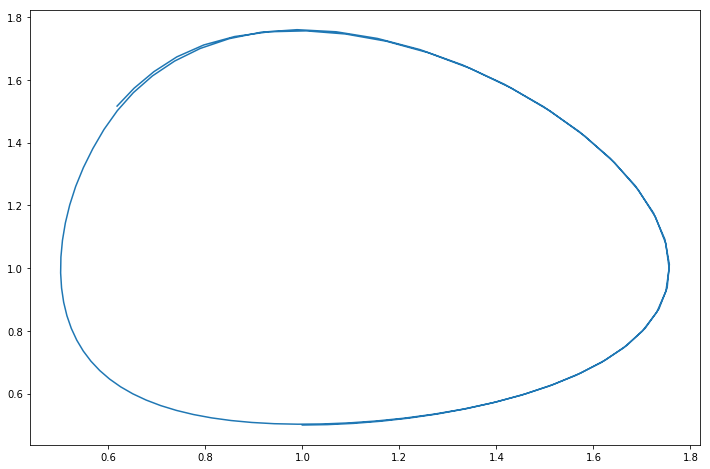

In [33]:
plt.plot(X[0], X[1])

# Choix des méthodes numérique

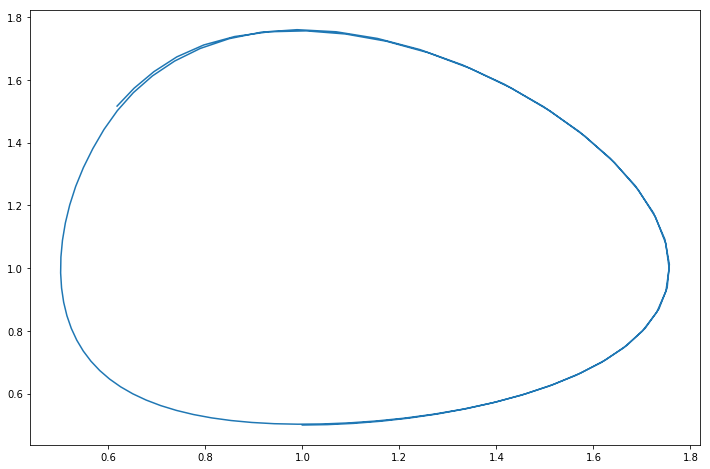

In [35]:
resultat = solve_ivp(fun=flux, t_span=(0, 20), y0 = [1, 0.5], dense_output=True, method='RK45')
t = np.linspace(0, 10, 100)
x,y = resultat.sol(t)
plt.plot(x,y)

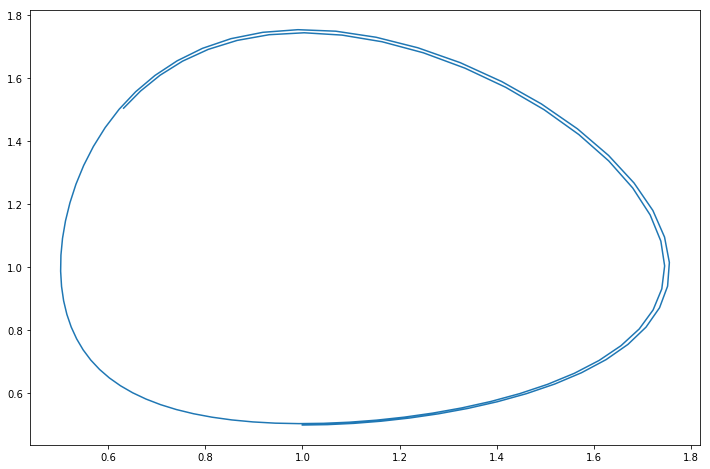

In [36]:
resultat = solve_ivp(fun=flux, t_span=(0, 20), y0 = [1, 0.5], dense_output=True, method='RK23')
t = np.linspace(0, 10, 100)
x,y = resultat.sol(t)
plt.plot(x,y)

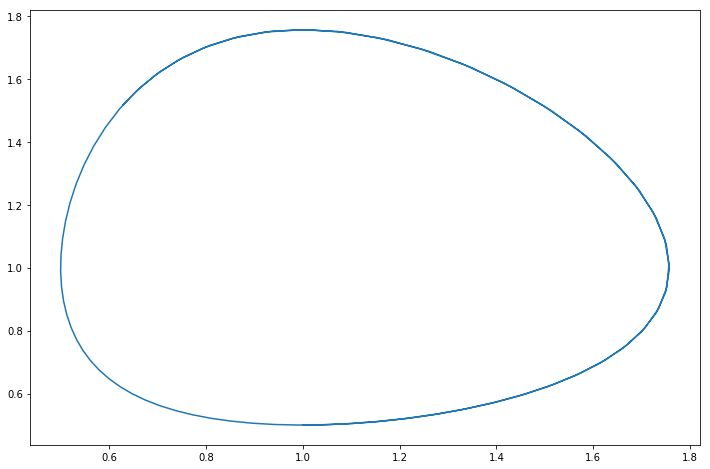

In [37]:
resultat = solve_ivp(fun=flux, t_span=(0, 20), y0 = [1, 0.5], dense_output=True, method='Radau')
t = np.linspace(0, 10, 100)
x,y = resultat.sol(t)
plt.plot(x,y)

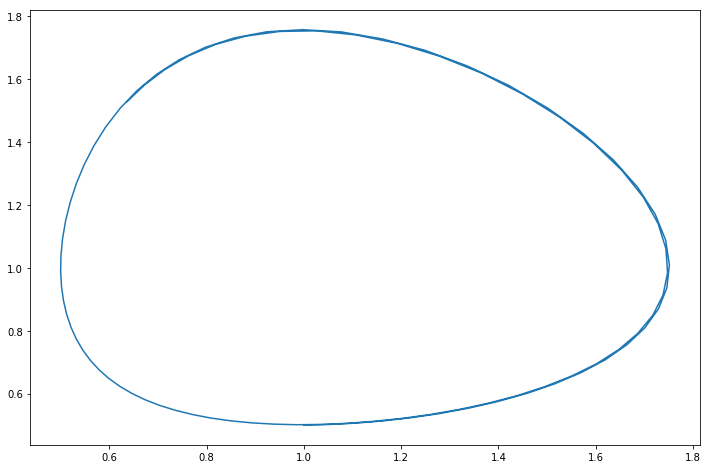

In [38]:
resultat = solve_ivp(fun=flux, t_span=(0, 20), y0 = [1, 0.5], dense_output=True, method='BDF')
t = np.linspace(0, 10, 100)
x,y = resultat.sol(t)
plt.plot(x,y)